<a href="https://colab.research.google.com/github/saincoder404/xeven_AI/blob/master/Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Regression models using SKlearn***

***Regression model***



1.   *Regression model using sklearn*
2.   *Model evaluation*



In [ ]:
# import dependances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)

import warnings
warnings.simplefilter(action="ignore", category= FutureWarning)

***Data Preprocessing***

In [ ]:
# load data
data = pd.read_csv('USA_Housing.csv')

In [ ]:
data.shape

(5000, 7)

In [ ]:
data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


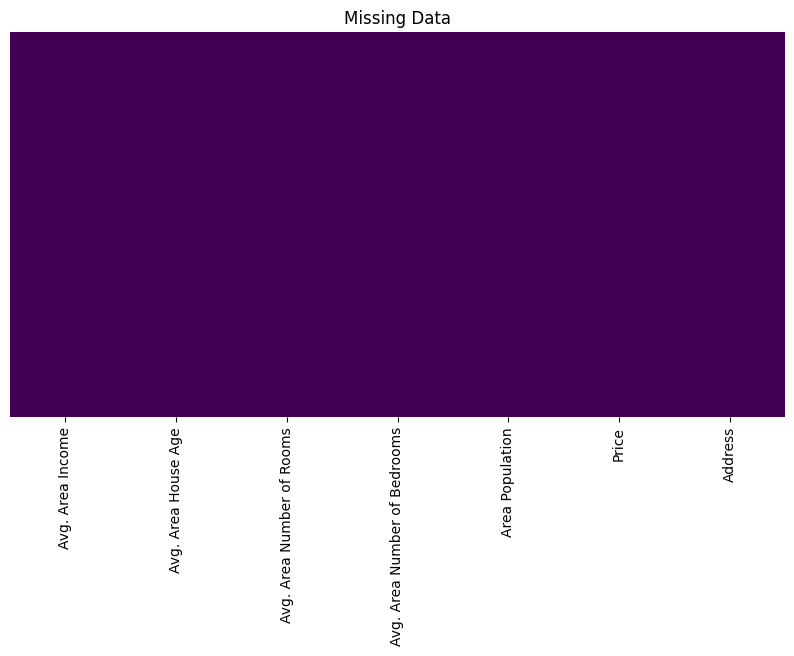

In [ ]:
# Missing data heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()

In [ ]:
# Remove address column
data.drop('Address', axis=1, inplace = True)

In [ ]:
data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
# Drop null values
data.dropna(inplace=True)

In [ ]:
# sum null vaalues
data.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0


In [ ]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [ ]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


***Seperate the feature and target variable***

In [ ]:
x = data.drop('Price', axis=1)
y = data['Price']

***Standardize the data***

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_transform = scaler.fit_transform(x)

In [ ]:
x_transform.shape

(5000, 5)

In [ ]:
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

***Split the data into train data and test data***

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.2, random_state=101)

In [ ]:
x_train.shape

(4000, 5)

In [ ]:
x_test.shape

(1000, 5)

In [ ]:
y_train.shape

(4000,)

In [ ]:
y_test.shape

(1000,)

***Model selection and training***

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# predict
y_pred = lr.predict(x_test)
print(y_pred.shape)
print(y_pred)

(1000,)
[1257919.72909701  822112.41884176 1740669.05865509  972452.12917479
  993422.26329292  644126.07414431 1073911.7910164   856584.00194141
 1445318.25518372 1204342.19071214 1455792.46212894 1298556.65696451
 1735924.33836104 1336925.77577778 1387637.43231928 1222403.77772052
  613786.28691938  963933.54416253 1221197.33050132 1198071.57563599
  505861.89531635 1769106.54723384 1853881.16842504 1200369.50507893
 1065129.12850721 1812033.73067346 1768686.47091279 1439920.83814321
 1387251.9964939  1541178.39224186  726418.80504233 1754497.60908684
 1462185.72653163 1025600.16081117 1284926.86851559  917454.59590873
 1187046.94956896  999330.91117487 1329536.63409608  782191.6044142
 1393272.03053858  578216.88394869  822643.37151015 1895533.11413239
 1672019.84892042  966926.45434591 1129674.55638148  792797.75914644
 1161057.18412151 1472396.71417146 1457656.70412287 1162939.33422896
 1099453.68110994 1358107.44619388  841103.70380549  986322.30573623
 1123323.5300213  1253538.6

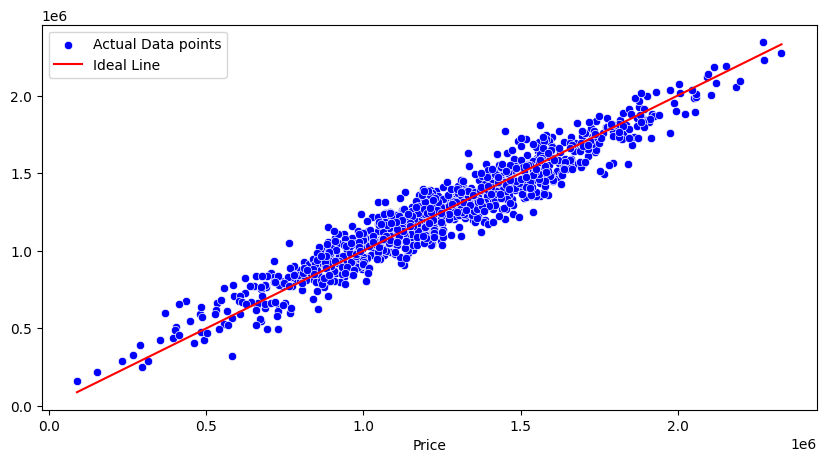

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()


In [ ]:
# combine actual and predicted values side by side
result = np.column_stack((y_test, y_pred))

#print the result
print("Actual values    |     Predicted Values")
print("_______________________________________")

for actual, predicted in result:
    print(f"{actual:14.2f}    |    {predicted:12.2f}")

Actual values    |     Predicted Values
_______________________________________
    1251688.62    |      1257919.73
     873048.32    |       822112.42
    1696977.66    |      1740669.06
    1063964.29    |       972452.13
     948788.28    |       993422.26
     730043.65    |       644126.07
    1166925.15    |      1073911.79
     705444.12    |       856584.00
    1499988.88    |      1445318.26
    1288199.15    |      1204342.19
    1441736.76    |      1455792.46
    1279681.15    |      1298556.66
    1754969.16    |      1735924.34
    1511653.45    |      1336925.78
    1441956.20    |      1387637.43
    1119992.62    |      1222403.78
     727866.53    |       613786.29
    1138885.10    |       963933.54
    1074263.32    |      1221197.33
    1386473.37    |      1198071.58
     404643.60    |       505861.90
    1449829.49    |      1769106.55
    1775874.76    |      1853881.17
    1202050.58    |      1200369.51
    1105737.46    |      1065129.13
    1835564.69    | 

In [ ]:
# Residual Analysis
residual = actual - y_pred.reshape(-1)
print(residual)

[-6.97228472e+04  3.66084463e+05 -5.52472177e+05  2.15744753e+05
  1.94774619e+05  5.44070808e+05  1.14285091e+05  3.31612880e+05
 -2.57121373e+05 -1.61453088e+04 -2.67595580e+05 -1.10359775e+05
 -5.47727456e+05 -1.48728894e+05 -1.99440550e+05 -3.42068958e+04
  5.74410595e+05  2.24263338e+05 -3.30004486e+04 -9.87469372e+03
  6.82334987e+05 -5.80909665e+05 -6.65684287e+05 -1.21726232e+04
  1.23067753e+05 -6.23836849e+05 -5.80489589e+05 -2.51723956e+05
 -1.99055115e+05 -3.52981510e+05  4.61778077e+05 -5.66300727e+05
 -2.73988845e+05  1.62596721e+05 -9.67299866e+04  2.70742286e+05
  1.14993234e+03  1.88865971e+05 -1.41339752e+05  4.06005277e+05
 -2.05075149e+05  6.09979998e+05  3.65553510e+05 -7.07336232e+05
 -4.83822967e+05  2.21270428e+05  5.85223255e+04  3.95399123e+05
  2.71396978e+04 -2.84199832e+05 -2.69459822e+05  2.52575477e+04
  8.87432008e+04 -1.69910564e+05  3.47093178e+05  2.01874576e+05
  6.48733519e+04 -6.53417504e+04 -2.40082781e+05  6.89093673e+05
 -2.74620202e+05  7.94525

<Axes: ylabel='Density'>

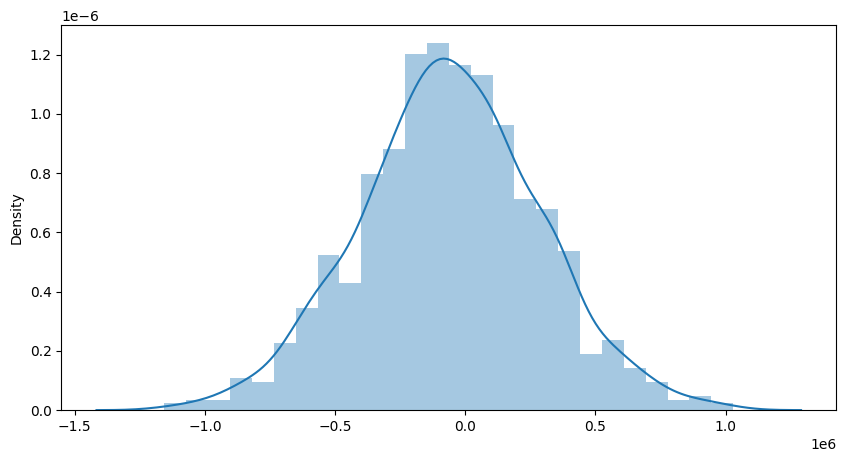

In [ ]:
sns.distplot(residual, kde = True)

***Model Evaluation***

In [ ]:
from sklearn.metrics import mean_squared_error

print("Linear regression model")
print("--"*20)
mse = mean_squared_error(y_test, y_pred)
result_mse = np.sqrt(mse)


print('Evaluate Metrics')
print("Mean Square Error}", mse)
print("Root mean square error", result_mse)


Linear regression model
----------------------------------------
Evaluate Metrics
Mean Square Error} 10100187858.867598
Root mean square error 100499.69083966178


***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
Dtr = mean_squared_error(y_test, y_pred_dt)
print('Decision tree regrssion:', Dtr)

Decision tree regrssion: 31700005960.310116


***Random forest***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rmF = RandomForestRegressor()
rmF.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rmF = rmF.predict(x_test)

In [ ]:
Rfr = mean_squared_error(y_test, y_pred_rmF)
print('Random Forest Regrssion:', Rfr)

Random Forest Regrssion: 15231773418.623203


***Gradient boosting regression***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_gb = gb.predict(x_test)

In [ ]:
gbr = mean_squared_error(y_pred_gb, y_test)
print('Gradient Boosting Regrssion:', gbr)

Gradient Boosting Regrssion: 12397704900.617958


In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 10100187858.867598,
    "Decision Tree": 32663534267.22157,
    "Random Forest": 15205642320.905537,
    "Gradient Boosting": 12390925216.983454
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (lower values are better):
1. Linear Regression: 10100187858.867598
2. Gradient Boosting: 12390925216.983454
3. Random Forest: 15205642320.905537
4. Decision Tree: 32663534267.22157
